<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digit Recognition

--@author: Yash Jain(github: https://github.com/yashjain-99)
--Dataset from: http://yann.lecun.com/exdb/mnist/index.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd

In [3]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/digit-recognizer.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.mkdir('/content/digitrecog')
zip_ref.extractall('/content/digitrecog')
zip_ref.close()

In [4]:
import pandas as pd
train=pd.read_csv('/content/digitrecog/train.csv')
test=pd.read_csv('/content/digitrecog/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.drop(['label'], axis = 1)
y_train = train['label']
res=y_train.unique()
print(res)

[1 0 4 7 3 5 8 9 2 6]


In [6]:
X_train.shape

(42000, 784)

In [7]:
y_train.shape

(42000,)

In [8]:
y_train = tf.constant(y_train)
X_train = tf.constant(np.array(X_train), dtype = tf.float64)
test = tf.constant(np.array(test), dtype = tf.float32)

In [9]:
X_train.shape, test.shape

(TensorShape([42000, 784]), TensorShape([28000, 784]))

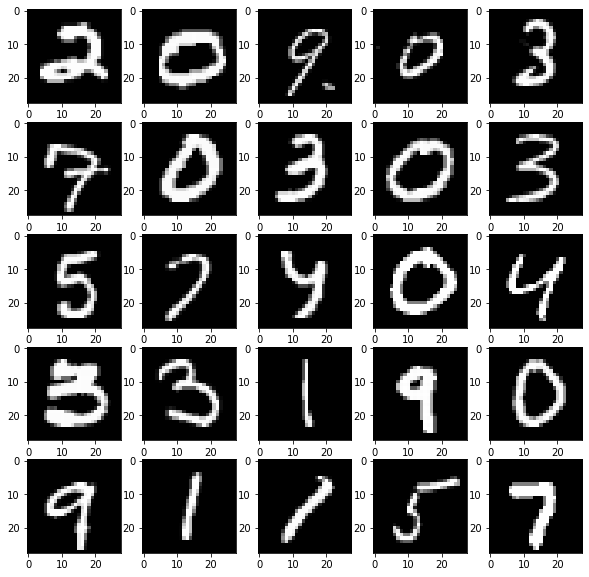

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
count = 1
idd = 0
for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, count)
        plt.imshow(tf.constant(test[idd, :], shape = [28, 28]), cmap = 'gray')
        idd += 1
        count += 1

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train.numpy(), y_train.numpy(), test_size = 0.2)
X_train.shape, X_valid.shape

((33600, 784), (8400, 784))

In [12]:
X_train = tf.reshape(X_train, shape = [-1, 28, 28, 1])
X_valid = tf.reshape(X_valid, shape = [-1, 28, 28, 1])
X_test = tf.reshape(test, shape = [-1, 28, 28, 1])

y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)

In [13]:
X_train.shape, X_test.shape, X_valid.shape

(TensorShape([33600, 28, 28, 1]),
 TensorShape([28000, 28, 28, 1]),
 TensorShape([8400, 28, 28, 1]))

In [14]:
y_train.shape, y_valid.shape

((33600, 10), (8400, 10))

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [16]:
callbacks = myCallback()
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    )
validation_datagen = ImageDataGenerator(rescale = 1./255)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(X_valid, y_valid, batch_size=32),
                              validation_steps=len(X_valid) / 32,
                              callbacks=[callbacks])

model.evaluate(X_valid, y_valid, verbose=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
1050/1050 [==============================] - 34s 23ms/step - loss: 0.6437 - accuracy: 0.7825 - val_loss: 0.0874 - val_accuracy: 0.9767
Epoch 2/15
1050/1050 [==============================] - 26s 25ms/step - loss: 0.1694 - accuracy: 0.9526 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 3/15
1050/1050 [==============================] - 26s 25ms/step - loss: 0.1269 - accuracy: 0.9632 - val_loss: 0.0603 - val_accuracy: 0.9845
Epoch 4/15
1050/1050 [==============================] - 29s 27ms/step - loss: 0.1141 - accuracy: 0.9684 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 5/15
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1011 - accuracy: 0.9717 - val_loss: 0.0747 - val_accuracy: 0.9799
Epoch 6/15
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0934 - accuracy: 0.9744 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 7/15
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0837 - accuracy: 0.9771 - val_loss: 0.0404 -

[13.258624076843262, 0.9565476179122925]

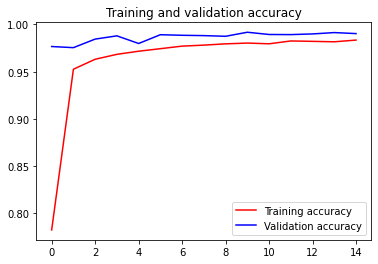

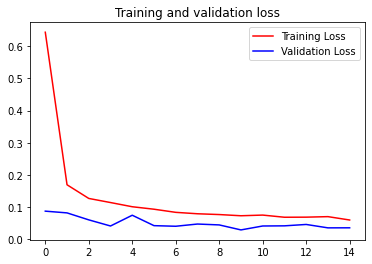

In [17]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [18]:
pred = model.predict(X_test)
pred[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

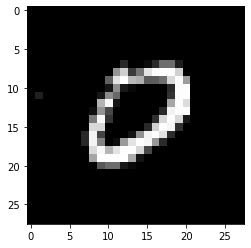

In [19]:
plt.imshow(tf.constant(X_test[3], shape = [28, 28]), cmap = 'gray')

In [20]:
import math
def display_batch_of_images(images, predictions=None):
    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, image in enumerate(images[:rows*cols]):
        title = ''
        correct = True
        if predictions is not None:
            title = predictions[i]
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 
        plt.subplot(*subplot)
        plt.imshow(tf.squeeze(image))
        plt.title(title)
        plt.axis("off")
        subplot = (subplot[0], subplot[1], subplot[2] +1)
    
    #layout
    plt.tight_layout()

    plt.subplots_adjust(wspace=4*SPACING, hspace=SPACING)
    plt.show()

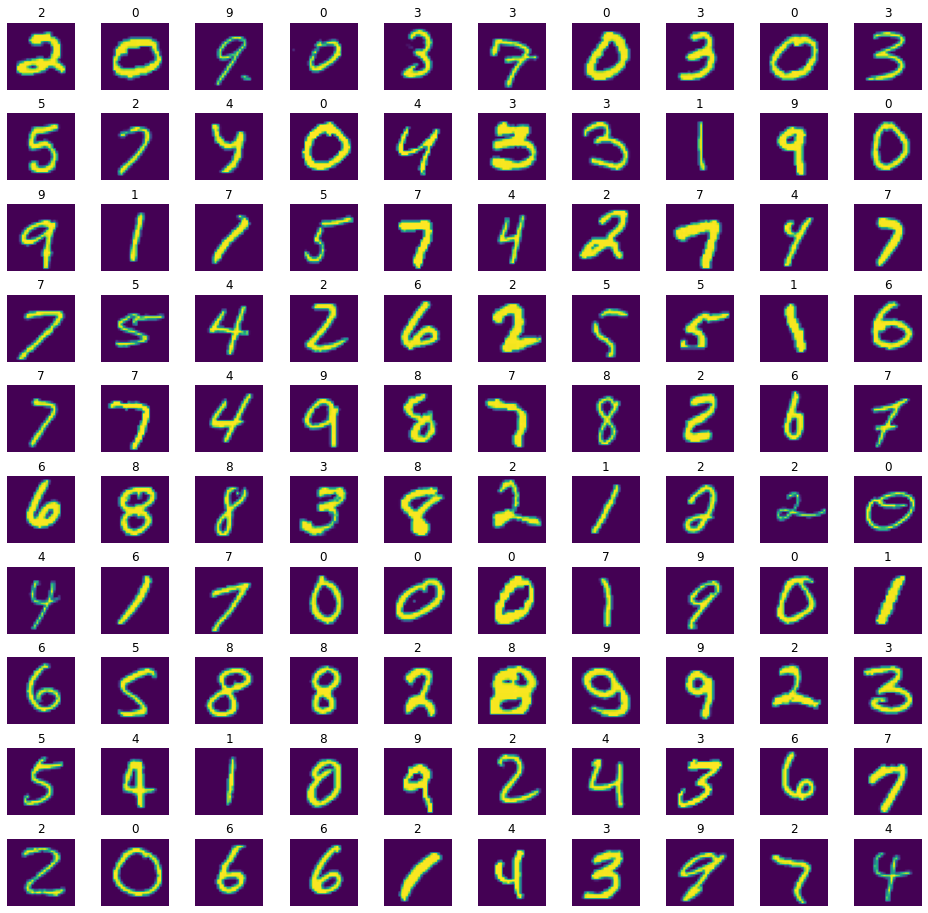

In [21]:
y_out = np.argmax(pred, axis = 1)
display_batch_of_images(X_test[:100], y_out)

In [29]:
sub = pd.read_csv('/content/digitrecog/sample_submission.csv')
sub['Label'] = y_out
sub.to_csv('submission.csv', index = False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
